In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

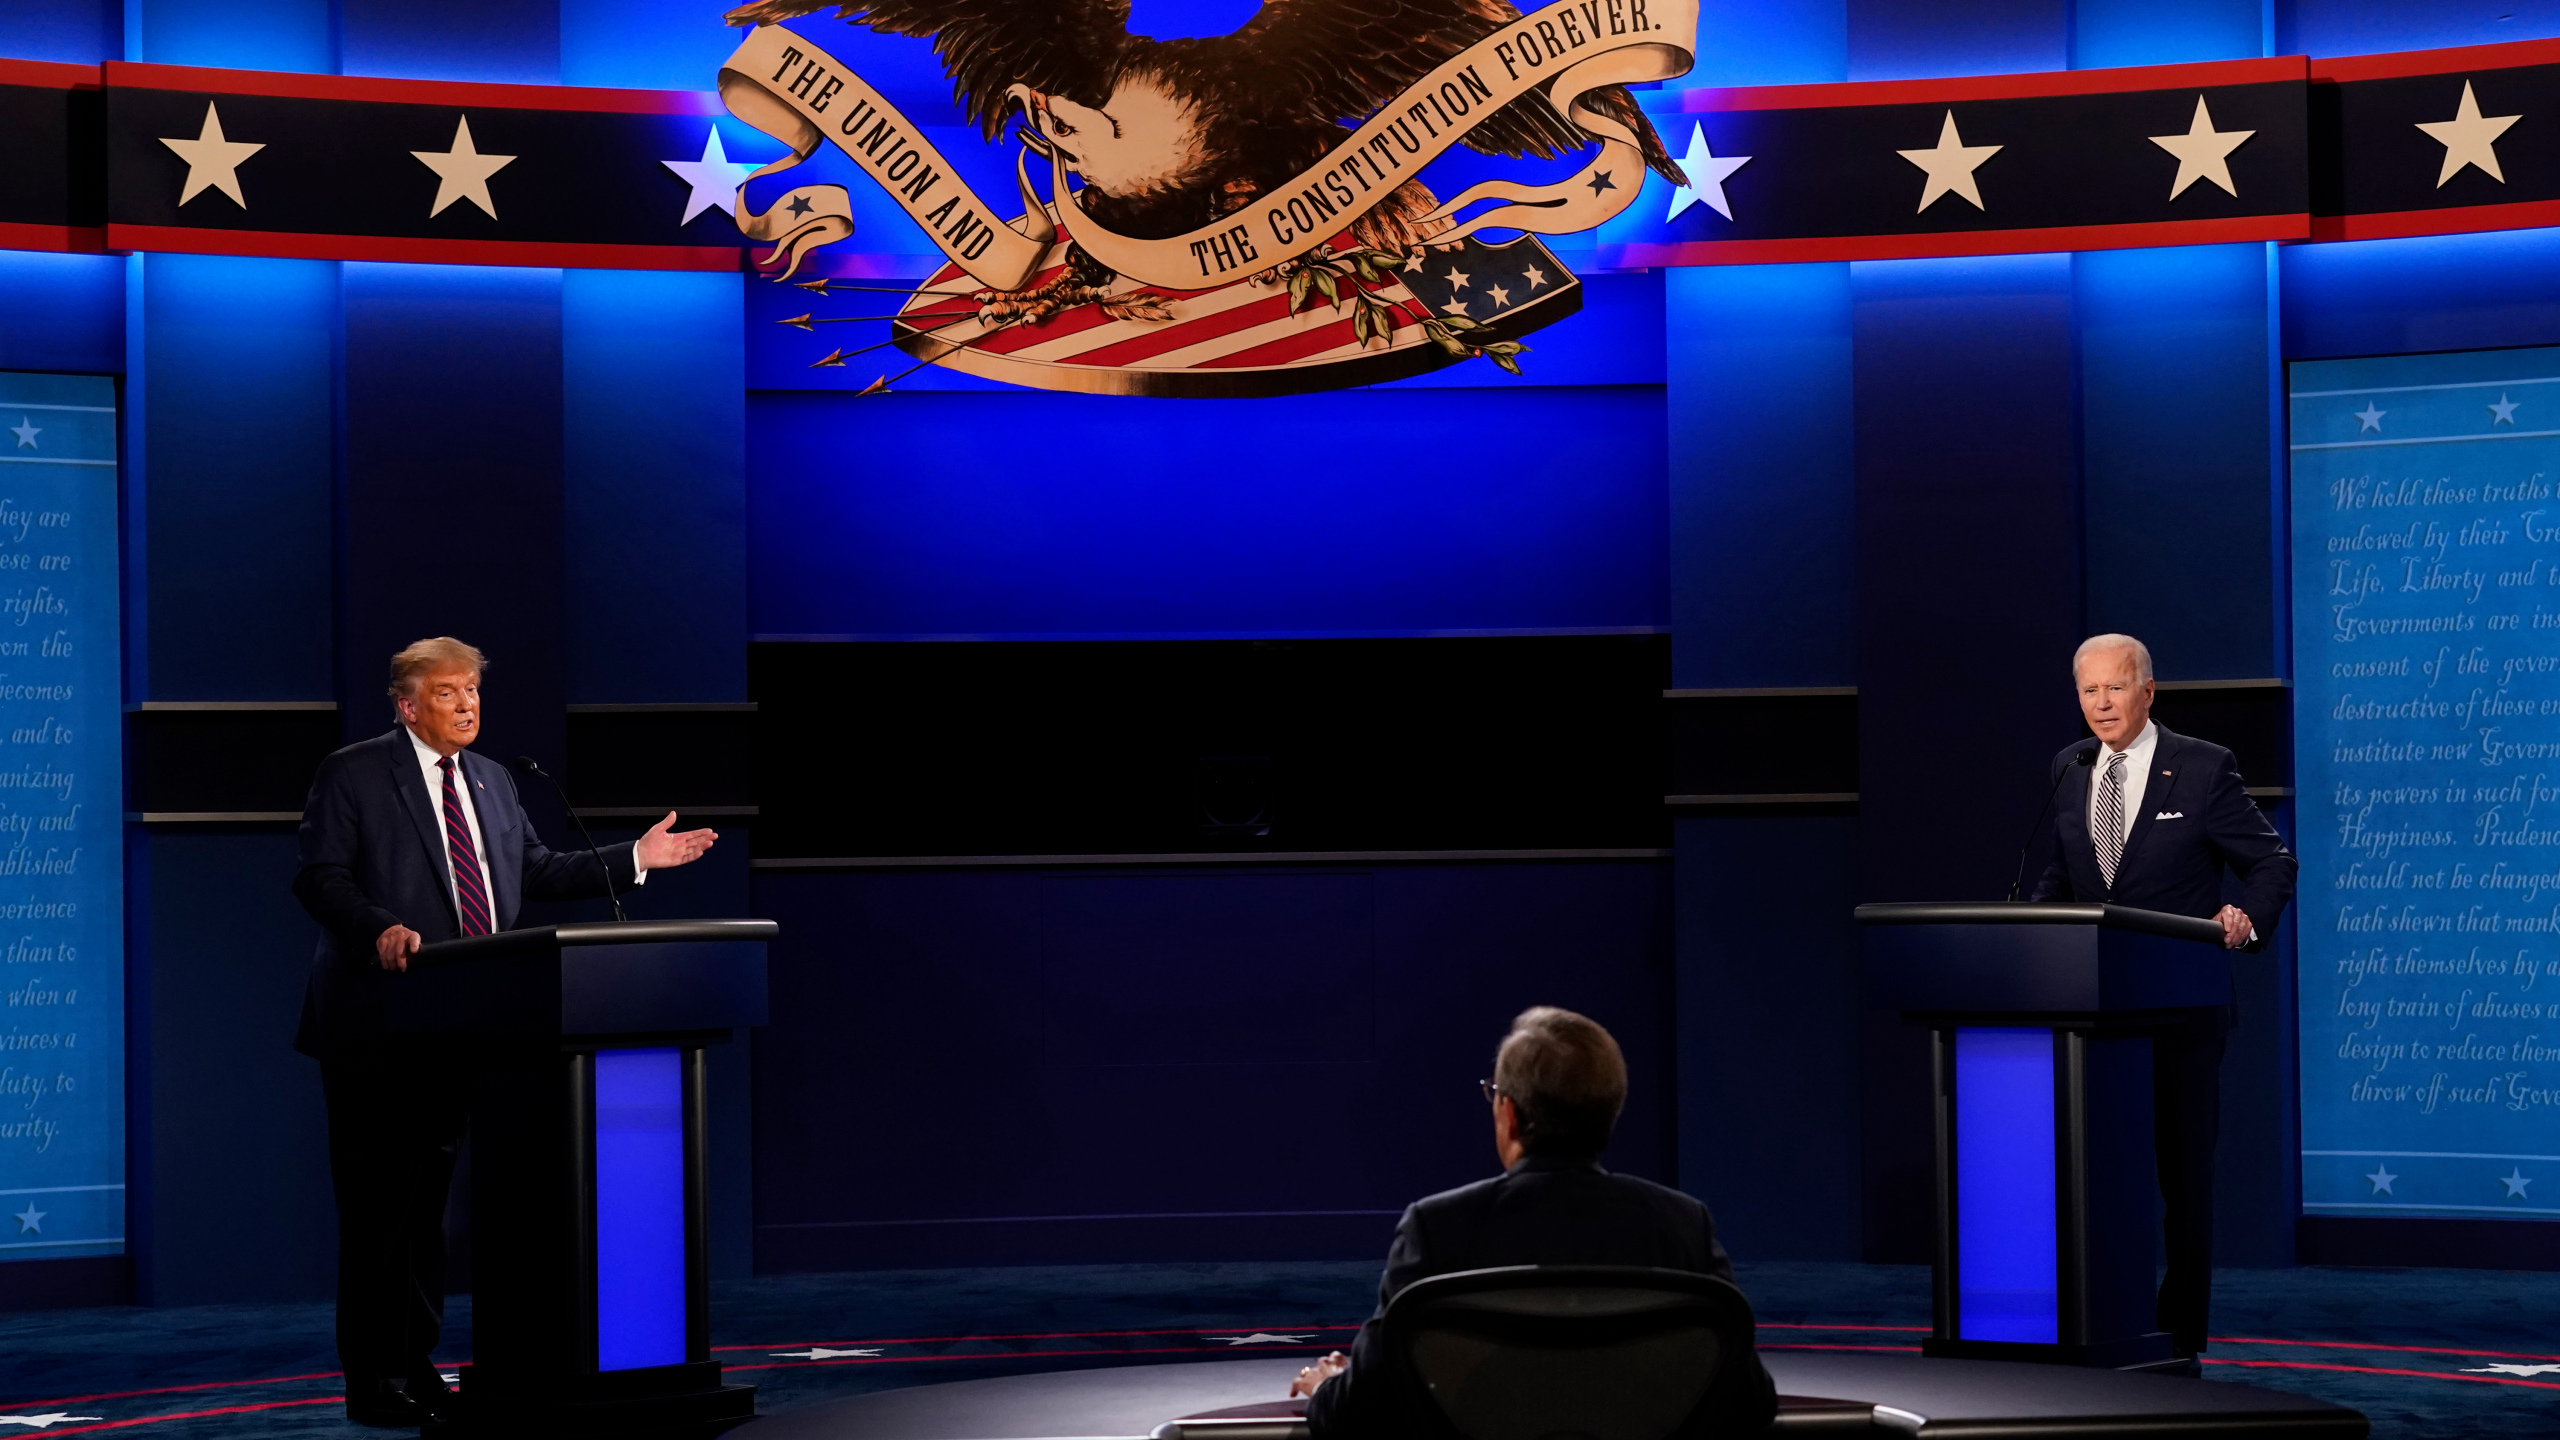

In [2]:
from IPython.display import Image
Image(filename='Election6.jpg')

In [4]:
twitter1 = pd.read_csv('DnldTrmp.csv')

In [5]:
twitter1.head()

,TWEET,COMMENTS,LIKES,RETWEETS
0,Hunter Biden Offered $10 Million Annually by C...,4.2K,30.5K,16K
1,Dozens of Trump supporters were loudly chantin...,3.7K,40.3K,18.2K
2,Biden is like China stealing intellectual prop...,1.3K,8.3K,2.8K
3,Comment,397,4.7K,1.5K
4,Did you see him at this thing? He looked like ...,1K,5.6K,1.9K


In [6]:
twitter1.shape

(707, 4)

In [10]:
twitter1.isnull().sum()

TWEET       75
COMMENTS     1
LIKES        0
RETWEETS     0
dtype: int64

In [ ]:
#Filling the empty tweets with the stopword 'and', as the stopwords get removed ahead in the code

In [12]:
twitter1['TWEET'].fillna('and', inplace =True)

In [13]:
twitter1.isnull().sum()

TWEET       0
COMMENTS    1
LIKES       0
RETWEETS    0
dtype: int64

In [16]:
twitter1_tweets = twitter1['TWEET']

In [17]:
type(twitter1_tweets)

pandas.core.series.Series

In [18]:
twitter1_tweets.shape

(707,)

In [25]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
import spacy

In [27]:
twitter1_tweets.head()

0    Hunter Biden Offered $10 Million Annually by C...
1    Dozens of Trump supporters were loudly chantin...
2    Biden is like China stealing intellectual prop...
3                                              Comment
4    Did you see him at this thing? He looked like ...
Name: TWEET, dtype: object

In [28]:
tweets = []

for tweet in twitter1_tweets:
    tweets.append(tweet)

In [29]:
sentences = []

for twt in tweets:
    snts = twt.split()
    sentences.append(snts)

In [32]:
words = []

for i in sentences:
    for k in i:
        words.append(k)

In [33]:
words[:11]

['Hunter',
 'Biden',
 'Offered',
 '$10',
 'Million',
 'Annually',
 'by',
 'Chinese',
 'Energy',
 'Firm',
 'for']

In [34]:
# words is a list of all the words that the tweets consists of

In [35]:
len(words)

15151

# HASHTAGS

In [36]:
hshtgs = []
words_list = []

for j in words:
    if j.startswith('#'):
        hshtgs.append(j)
    else:
        words_list.append(j)              

In [37]:
len(hshtgs)

120

In [38]:
hshtgs[:15]

['#JoeBidenUkraineScandal',
 '#CrookedJoeBiden',
 '#JoeBidenUkraineScandal',
 '#HypocrisyHOF',
 '#2A,',
 '#WheresHunter',
 '#BidenCrimeFamily',
 '#Trump2020',
 '#KAG',
 '#MailInBallotFraud',
 '#BidenCrimeFamily',
 '#WheresHunter',
 '#Trump2020',
 '#KAG',
 '#BidenCrimeFamily']

In [39]:
hshtgs = [x.lower() for x in hshtgs]

In [40]:
# # Removing the '#' from the hashtags

main_tags = []

for tgs in hshtgs:
    tgs = tgs.replace('#',"")
    main_tags.append(tgs)

In [41]:
main_tags[:11]

['joebidenukrainescandal',
 'crookedjoebiden',
 'joebidenukrainescandal',
 'hypocrisyhof',
 '2a,',
 'whereshunter',
 'bidencrimefamily',
 'trump2020',
 'kag',
 'mailinballotfraud',
 'bidencrimefamily']

In [42]:
tags_str = []

for sr in main_tags:
    sr = str(sr)
    tags_str.append(sr)

In [43]:
# Removing Punctuations from the 'tags' list which consists of hashtags

import re
tags_str = [re.sub(r'[^A-Za-z0-9]+','', x) for x in tags_str]

In [47]:
len(tags_str)

120

In [44]:
from wordcloud import WordCloud

In [45]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(tags_str))

# HASHTAGS WORDCLOUD

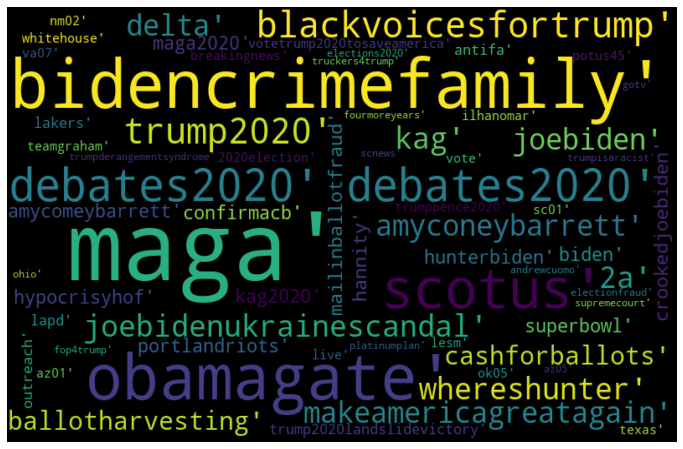

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('trump_hashtag_wordcloud.png', dpi=100)
plt.show()

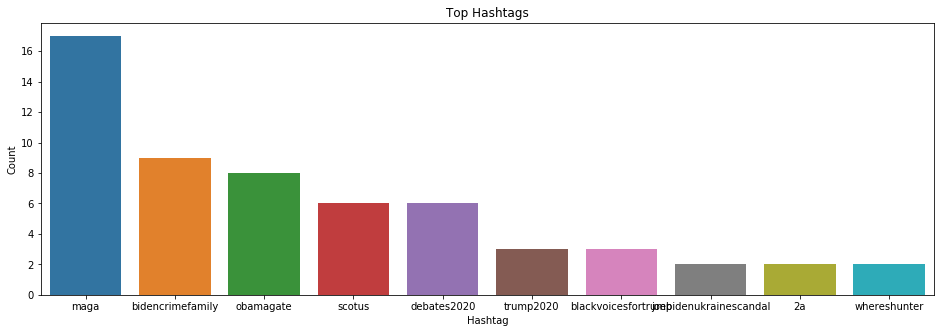

In [48]:
import seaborn as sns
a = nltk.FreqDist(tags_str)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Top Hashtags')
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('trump_top_hashtags.png', dpi=100)
plt.show()

In [50]:
hashtag_freq_list = d

In [51]:
hashtag_freq_list

,Hashtag,Count
11,maga,17
5,bidencrimefamily,9
18,obamagate,8
28,scotus,6
56,debates2020,6
6,trump2020,3
24,blackvoicesfortrump,3
0,joebidenukrainescandal,2
3,2a,2
4,whereshunter,2


In [ ]:
# As the punctuations have been removed, now let's remove the stopwords from the words list 

In [52]:
import re
words_list = [re.sub(r'[^A-Za-z0-9]+','', x.lower()) for x in words_list] 

In [53]:
all_words = []
for m in words_list:
    if m != "":
        all_words.append(m)
        

In [54]:
len(all_words)

14808

In [55]:
import nltk
from nltk.corpus import stopwords
stp = stopwords.words('english')

In [56]:
filter_words = []

for i in all_words:
    if i in stp:
        pass
    else:
        filter_words.append(i)

In [57]:
len(filter_words)

8810

In [ ]:
# I did not use stemming to bring down the words to their root words because
# some of the stemmed words seemed not correct
# Hence I removed the idea of Stemming

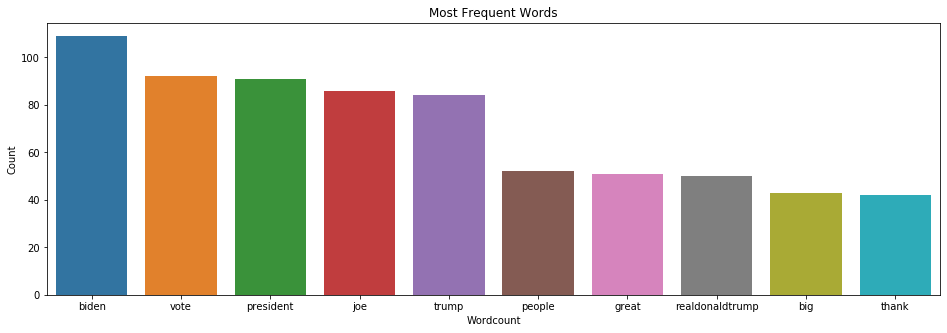

In [58]:
aa = nltk.FreqDist(filter_words)
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
plt.title('Most Frequent Words')
ax = sns.barplot(data=dd, x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
plt.savefig('trump_all_freq.png', dpi=100)
plt.show()

In [59]:
trump_freq_list = dd

In [60]:
trump_freq_list

,Wordcount,Count
1,biden,109
379,vote,92
29,president,91
96,joe,86
14,trump,84
43,people,52
222,great,51
90,realdonaldtrump,50
208,big,43
68,thank,42


In [61]:
wrdcld = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(str(filter_words))

# WORDCLOUD FOR ALL THE WORDS IN THE TWEETS

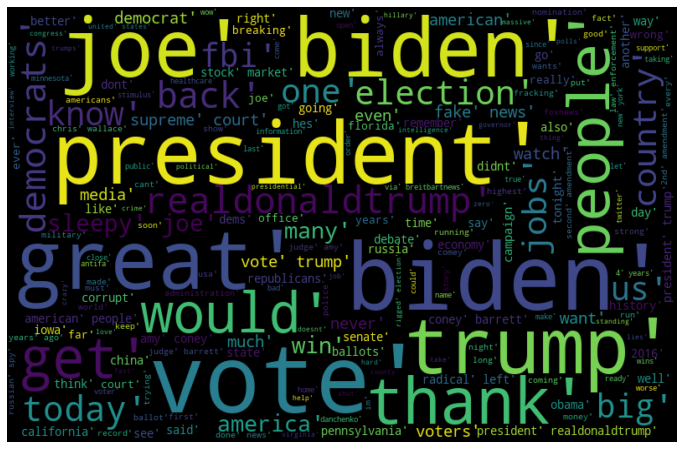

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.imshow(wrdcld, interpolation='bilinear', aspect ='auto')
plt.axis("off")
plt.savefig('trump_most_freq_wordcloud.png', dpi=100)
plt.show()